In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data.csv")
df_right = df[df["Hand"] == "Right"].copy()
df_left = df[df["Hand"] == "Left"].copy()
df_both = df[df["Hand"] == "Both"].copy()

In [3]:
xy_right = df_right[["x [cm]", "y [cm]"]].to_numpy()
mu_right = np.mean(xy_right, axis=0)

xy_left = df_left[["x [cm]", "y [cm]"]].to_numpy()
mu_left = np.mean(xy_left, axis=0)

xy_both = df_both[["x [cm]", "y [cm]"]].to_numpy()
mu_both = np.mean(xy_both, axis=0)

mu_right, mu_left, mu_both

(array([-2.57166667, -0.33      ]),
 array([3.27666667, 1.375     ]),
 array([0.46666667, 0.86166667]))

In [4]:
df_right["mean distance [cm]"] = np.sqrt(
    (df_right["x [cm]"] - mu_right[0]) ** 2 + (df_right["y [cm]"] - mu_right[1]) ** 2
)
df_left["mean distance [cm]"] = np.sqrt(
    (df_left["x [cm]"] - mu_right[0]) ** 2 + (df_left["y [cm]"] - mu_right[1]) ** 2
)
df_both["mean distance [cm]"] = np.sqrt(
    (df_both["x [cm]"] - mu_right[0]) ** 2 + (df_both["y [cm]"] - mu_right[1]) ** 2
)

ValueError: x and y must have same first dimension, but have shapes (10,) and (60,)

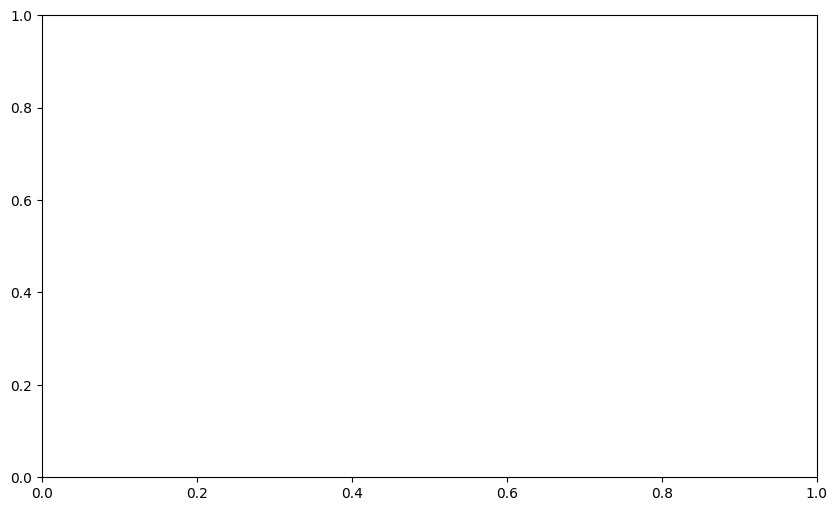

In [5]:
plt.figure(figsize=(10, 6))

x = np.arange(1, 11)
plt.plot(x, df_right["mean distance [cm]"], label="Right", color="blue", marker="o")
plt.plot(x, df_left["mean distance [cm]"], label="Left", color="orange", marker="o")
plt.plot(x, df_both["mean distance [cm]"], label="Both", color="green", marker="o")

plt.title("Variance Decrease")
plt.xlabel("Trial")
plt.ylabel("Distance from Mean [cm]")
plt.legend()

plt.show()

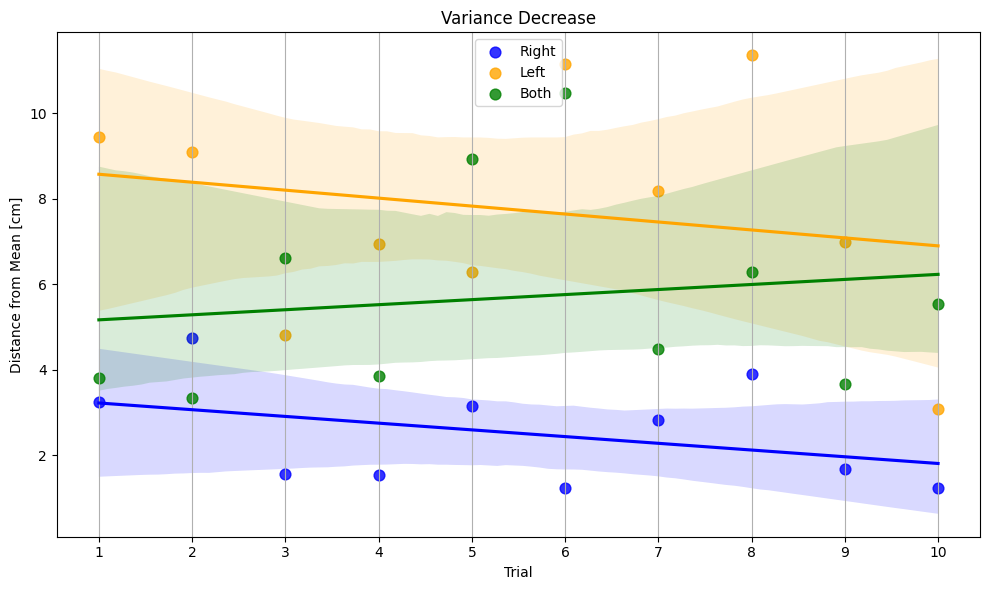

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(
    data=df_right,
    x=df_right.index + 1,
    y="mean distance [cm]",
    label="Right",
    scatter=True,
    color="blue",
    marker="o",
    scatter_kws={"s": 60},
)
sns.regplot(
    data=df_left,
    x=df_right.index + 1,
    y="mean distance [cm]",
    label="Left",
    scatter=True,
    color="orange",
    marker="o",
    scatter_kws={"s": 60},
)
sns.regplot(
    data=df_both,
    x=df_right.index + 1,
    y="mean distance [cm]",
    label="Both",
    scatter=True,
    color="green",
    marker="o",
    scatter_kws={"s": 60},
)

plt.title("Variance Decrease")
plt.xlabel("Trial")
plt.ylabel("Distance from Mean [cm]")
plt.xticks(ticks=np.arange(1, 11), labels=np.arange(1, 11))
plt.grid(True, axis="x")
plt.legend()
plt.tight_layout()
plt.show()